## Numpy

In [1]:
import numpy as np

openArray = np.array([1,2,3,3], dtype='float64')
highArray = np.array([2,3,4,3], dtype='float64')
lowArray = np.array([0.5, 1.5, 2.5,1.5], dtype='float64')
closeArray = np.array([1.5, 2.5,3.5, 2.5], dtype='float64')

## Pandas

In [2]:
import pandas as pd

timeIndex = pd.date_range("20180808",periods=len(closeArray))
print(timeIndex)

DatetimeIndex(['2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11'], dtype='datetime64[ns]', freq='D')


In [3]:
candleDF = pd.concat([pd.Series(openArray), pd.Series(highArray), pd.Series(lowArray), pd.Series(closeArray)], axis=1, keys =('open', 'high', 'low', 'close') )
candleDF.index = timeIndex

## talib

In [4]:
import talib as ta

EMA = pd.Series(ta.EMA(closeArray,2), index=timeIndex)

## matplotlib & mpl_finance

In [5]:
from matplotlib.pylab import date2num

candleDF['time'] = list(map(date2num, candleDF.index))
candle = candleDF.reindex_axis(["time", "open", "high", "low", "close"], 1).values

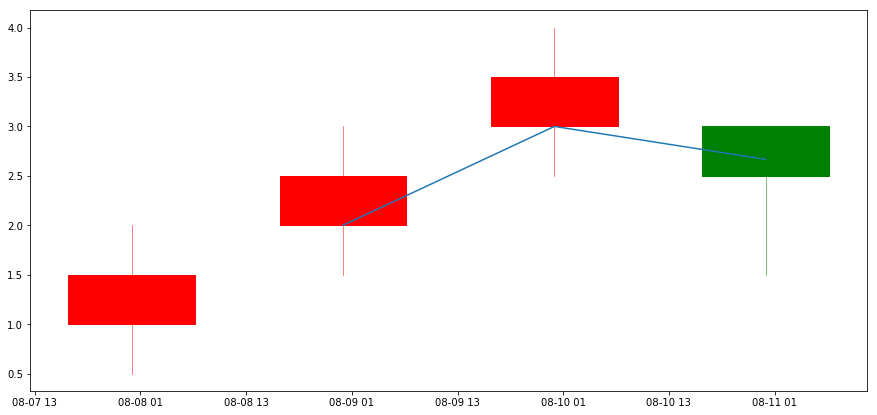

In [6]:
import matplotlib.pyplot as plt
import mpl_finance

fig, (ax) = plt.subplots(1,1,sharex=True, figsize=(15,7))
mpl_finance.candlestick_ohlc(ax, candle, width=0.6, colorup='r', colordown='g',alpha=1.0)
ax.plot(EMA)
ax.xaxis_date()
plt.show()

## requests & bs4

In [7]:
import requests
r=requests.get("http://bbs.fxdayu.com")

In [8]:
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
bsObj=BeautifulSoup(r.text)
topics=bsObj.findAll("div",{"class":"row"})

In [9]:
name_list=[]
for t in topics:
    name=t.find("a",{"class":"username"})
    if  name:
        name=name.text
    else :
        continue
    name_list.append(name)
print(set(name_list))

{'leon', 'zongzong', 'xinge', 'ukamoy', '叶蓝山', '吴欣亭', 'bboysky', 'bruce', 'Channel_CMT'}
